<a href="https://colab.research.google.com/github/uzma-knpc/Generative-AI/blob/main/Medimagrecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Medical Images Recognition system with embedding

In [2]:
!pip install -Uq facenet-pytorch

In [3]:
!pip install -Uq pillow




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 35.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
facenet-pytorch 2.6.0 requires Pillow<10.3.0,>=10.2.0, but you have pillow 11.1.0 which is incompatible.


In [62]:
import torch
import torch.nn as nn
import torchvision.models as models

import torchvision.transforms as transforms
from PIL import Image

In [63]:
from facenet_pytorch import MTCNN, InceptionResnetV1

model = InceptionResnetV1(pretrained='vggface2').eval()


In [64]:
# Preprocessing function to transform the image into a tensor
def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    return preprocess(image).unsqueeze(0)

# Function to create image embeddings
def create_image_embedding(image_path):
    try:
        input_tensor = preprocess_image(image_path)
        with torch.no_grad():
            embeddings = model(input_tensor)# ebedding important line
        return embeddings.squeeze().numpy()
    except Exception as e:
        print("Error:", e)
        return None

In [ ]:
!mkdir images

In [7]:
# prompt: create python function where we provide image url and imag_name then it save in images folder

import requests
import os

def save_image_from_url(image_url, image_name):
  """
  Downloads an image from a URL and saves it to the 'images' folder.

  Args:
    image_url: The URL of the image to download.
    image_name: The name of the file to save the image as.
  """
  try:
    if not os.path.exists("images"):
      os.makedirs("images")

    image_path = os.path.join("images", image_name)

    response = requests.get(image_url, stream=True)
    response.raise_for_status()  # Raise an exception for bad status codes

   #chunks
    with open(image_path, 'wb') as file:
      for chunk in response.iter_content(chunk_size=8192):
        file.write(chunk)

    print(f"Image saved to: {image_path}")
  except requests.exceptions.RequestException as e:
    print(f"Error downloading image: {e}")
  except Exception as e:
    print(f"An error occurred: {e}")


In [8]:
save_image_from_url("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRC9F_G4u8lJJ8O-c00QZp7AdhzPPhNxPDdKA&s","DMSAscan.jpg")
save_image_from_url("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRD5qEm-UkPtDgjsuQVDSKFPSF4izu6npoWfA&s", "MAG3scan.jpg")

save_image_from_url("https://ars.els-cdn.com/content/image/1-s2.0-S1930043318306022-gr1.jpg","lungscan.jpg")
save_image_from_url("https://img.medscapestatic.com/pi/meds/ckb/51/26751tn.jpg","Bonescan.jpg")
save_image_from_url("https://ars.els-cdn.com/content/image/1-s2.0-S0001299823000296-gr2.jpg",'Thyroidscan.jpg')
save_image_from_url("https://pub.mdpi-res.com/applsci/applsci-12-00698/article_deploy/html/images/applsci-12-00698-g001.png?1642052715","RenelScan.jpg")

Image saved to: images/DMSAscan.jpg
Image saved to: images/MAG3scan.jpg
Image saved to: images/lungscan.jpg
Image saved to: images/Bonescan.jpg
Image saved to: images/Thyroidscan.jpg
Image saved to: images/RenelScan.jpg


Error downloading image: No connection adapters were found for ''

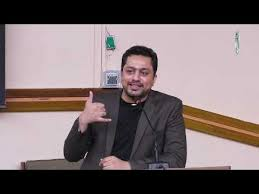

In [ ]:
save_image_from_url("data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxIQEhUSEhIVFRUQFhAVFhcWFRUVFxYQFRUXFhYWFxYYHSggGBolHhcVITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGhAQGi0dHx0tLSstLSstLS0rKy0rLS0tLSstLS0rLS0tLS0tLS0tKy0tLS0tLS03Li03OCsrLSsrK//AABEIAMIBAwMBIgACEQEDEQH/xAAcAAEAAQUBAQAAAAAAAAAAAAAAAQIDBAUHBgj/xABJEAABAwEDBgoECgkFAQEAAAABAAIDEQQhMQUGEkFRkRMiUmFxgZKhsdEyU3LSBxYkM0JDVLLB8BQVFzRzgpPC4SNEYqLxo2P/xAAZAQEBAQEBAQAAAAAAAAAAAAAAAQIDBAX/xAAhEQEBAAICAQUBAQAAAAAAAAAAAQIRAxIxEyFBUWEEIv/aAAwDAQACEQMRAD8A4aiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICldIzCYP0k3D5t/i1dQhibyRuCNTHb5nRfUccTeSNwV9sLeSNwRelfKqL6u4FvJbuCkQt5LdwQ6PlBF9YcA3kt3BOAbyW7gh1fJ6L6w4FvJbuCngW8lu4IdXyci+seBbyW7gqXxNp6LcRqG0IdHygi+rZIm3cVuI1DYqImtJcC1tzjqGGr8dyHR8qovq/gW8lu4IYW8lu4IdK+UEX1dwLeS3cE4FvJbuCHR8oovq3gW8lu4JwLeS3cEOj5SRfV3BN5LdwTgm8lu4IdHyii+rTC3kt3BRwLeS3cEOj5TRfVnAt5LdwTgW8lu4IdHymi+rOBbyW7gnAt5LdwQ6PlNF9WcC3kt3BQ6Ng+i2/mCHR8qIvqvgW8lu4KDC3kt3BDo+VUX1TwLeSNwRDo5BmD+9H+G77zV1GBcvzAHyo80b/vNXUYVb5aw8MuNZDQrEavhGlSrAVKkFBUiIiUREUQVEuHW3xCrVEmHWPFFimXV7X9rl57K2XGWeWhrpCuqoLSXNobxfpAn/1egmxb7Z+49c8zni+USmtSCCG6yHG8Dnqa02V2LWLz/wBfJnx8e8PL31htYlYHjBwBGq4gHC/btWSvOZmz6UAaQQYy4EEU+kSPzzL0SldeLK54TK/IVC1+VsvWay/PzNYTg3Fx59EX0Wphz+sDruGoedrh1qOm3pkWPYbdFO3Tie17drSDfz7FkICKVCCCoVShASilEFKKpEELXWo/KIRU31FKGhJNam7UGml62NFjW2McR/0g9u6oH9yMcnhkIpIUURtCKaKEHG8wB8qP8N33mLqkIXLvg9/ej/Cf95q6lCrfLOHhlMVwKhqutUaVBS1QpagrVKqUFBAVShSiewqJMOsKuipk/EIsW5sY/b/setXbclwyvcZC7jEggPc2uOppxp3Laz4x+2fuPURx8YkbfPzQYeS8lR2duiwUqak6ycLzruAHUvP5/Z2foTOCiNJ3gEGgOhGTTSvuqaGgXsSuN5wt/SMrysdQhr4mj2WxsqN+kifkeXlgtVpJkIfIXYuxJPPrKsyWGYCronAC4nRIXb7HYWUuAbW/ACqqnyYHDUVz711nBL8uF2a1yQuDmvc28XglpFMDcu1Zj51i3NMbq8LE0Em6j24Fwpga0r0rzuceSIeDfWNtQDq1rSfBc4syg1oOMU7XbCLneLQtY5bc8sOlm3ZioVSLQpREQEREBERAVl7eODStxHRe03jWKDfRXkRLNwCgqURVKKpEHG/g9/enfwn/AHmrqUK5b8H/AO9H+G/7zV1KFW+WcPDLarrVaYrwCjSVWFFFUECiUUojKEopRAoqJNXSFWqXjDpCNLc1xZ7Xi1w/HvVJtUbSQXC49PgreUsB0nwWgtmUxZw0mMEOB41G10tIjRvGy/oaRrWscZfLOWWnpTbIzSjxf0rmULWtntloIvdPIwOcK0YKGoGw1/6r0Nmy2JzRsejQNq7ig1qLqADUHHG6it2WBmlI15FHOce9Tkkkb4P9X3aqzZzPaRouZK2oBAaWuBOokraZXzi0CGCE6bgCG6VO9XI8nQNc1ofXSdW80FRsGtY+U8lttMr2uLQaUbXX0EYG9c3q61gyW7hOLJHo6WI0g6/ZULT/AAa2F36zkNDowxzX87nMa0dYLty3LsjCAuLjVx1VNB0BZ/we2V7XzyUGjOSa/Sqw6LR0en3KY33sc+XG2Tb21EVShdHBSUoqlCCFKUSiCKKFUoIQQimiUQQimiUQQimiIOOfB8PlR/hu+81dThZzLh1ktD4ySxxaaUqCQaEjYskZZtA+uk7bvNTky6045uO6MYrzWFcJblu0evk7bvNVDLc/r5O27zXL1fx09P8AXdwxTorhX65n9c/tu81DsrzH6156Xv8ANPW/D0/13bRKaC4QcqS+sdvcqTlGT1jt5T1vw9P9d50U0VwF9uk1vcesqgWp+oneU9X8PT/X0CRzq3I4XXjHaFwM2mQ0Gk6gwFTQLZW2wcHZoLQ17iZdIPacGuvoW81AtTO34PT/AF13KczQWVIoKl1+AupvvXkcs2YTFp0iODDhcGmpLq1qXDbSlFzqWcvFHXg6v/VjGxxcgbgumGdnw454y/Lpub+T2Mkq55po6J+bFQXMvFHnk7NatZXe2N72g8YgPadukDS/pqOpc4jgY01DACL601ra2eN7YRPiS8mn/wCYoKDm4pPWnJe0a4r1vs3bLLPIaSivB00SHjAip+jUH81VqC1uszyGxvOlTSJq4UqOMHVor/6zs9oo7hXxGlBoOxdz1BFFi5WytFEykby5x1k39Kz8PReSa23Ftme+pJreAOc7F7fN+xmGFocKON7gaXG+65cTlyrKS0hxbQgtINKFpB0hz1ovQ5O+Ee2sIEgjmaMSW6Dz/Mzig/yqY4/Lnycu3XUXksl/CBZJaCTShJ5Y0m19puA6QF6izWlkjdKN7Xt2tcHDeFtz2uFAEUoCgqVCCEREBERARQUQSiiqIOA5PiaSS+oaBU0rXEAYLbxRWTWXnt+a1QlaRdG1pOsONfBXY6bV5+fP33HXh9sdNy2OwjU/fJ7yuaNgP0Hb5PxctONHlK4A3ldy8tyrv2jZgWIfQdXoJ7tK9WqWXZ/8x+L1h0btO4qaD/l2Sp3z+jtGyjmsIF8JPPojzVX6TYvs/wD1b7y1gZzP7J8lPBHU2TsO8lN5neNmbXYvs1eljPNUm32Mf7VvZjWt4B/q5D/K7yU/orz9VJ2HeSv+/pe8bvJk1lmkbG2yMq7WWx0A1k3allZ35Oe5kMUMbiGlxo1twoBTC4YlY+aVhcJDIWuboinGBFSdlehe1MoAqRVevhtk3WMv9TTktoyVKwVfE9o20u3rE0F1a0zODbqX1xAuHRrXMrZHoSObUGjnXjA36l6Mbt5eTj6+7EcKAnmKyMhZxsbEIJ7gBxX0uofou8+ZWrRcxx5j4LQmIK5YyucyuN3G3yjZ4CeEjkjNKkgObU9VVS6KCJ1ZXh1Gg0YCeMQCG1GNxx5liZPyvPZg4QzyRiS5wYaaXSsRoDzQ1q41Os7ST03rMx0vqT6boScJx9HRbQBrdjdXX5q0H0uAxWWwXCmF1OhUTNAJOvDrWmd7WQ0krJs5fGdJjnMcMHNcWkdBCmNmiL8cVS9+rWbzzN1qj32ZWd80krLNPx+EqGPuDqgE8blVpSuPSugEL5/ssh4VrmkjRIoQaHqIwXsLDnPaosJnOGyTj9543evPy8047Nu3Hjco6gi8bZM+z9bB1xu/td5rdWTOiyS/Whh2SAsv9o8U9RTHmwy8VbhY26USMhwq0gg6wajeFJC6SopUkKUV2ilQqioTYiiKUTY8xZskRj6tvZCzosnRj6tnZC2fBBTwaahvbFZYo/Vs7IV9tkj5DeyFd0VIV1BbFmZyW7gqxA3kjcFcClE2tiIbB3KeCGwblWgQ2oMY2LByvlCOztbpelIQ1jdZcSL+YCt58wtl3c645l3Lf6TbxI01a17WR8zGnEDnNT1po37ugaVRpE1JrerT7SG68ML7qrT5Syg6KMm64EjoXO5c5Z5SeNo+ysad8uSY+XVcpSz8EXQtDydQe1p6q4rwGULLapJHSvgeLqmjSQABj3YrVxZWnH1z96uNyxO6oMr6UpStLjiLtS1I5Z545LFsk4h6h3rUkrMyi/igbT4LBBPWum3nUlbLI1nvLtgp1n/CwFvclspGOe/f/hQTBxNJvJvHsn/N3WFS6g4x/JU2vEOH0MfZOPmrcjtJ4AwF6Kuk7ecnoWO4kCpHpm/o1NFMVXb5NFtOUQOpW479teipI8Goq/k94bIxzxVtRpDaDiG9C9WbJA/0ZNE7H3X9Jp4rx5r+bz5Bb6CSrQa4gLwf2TWrp6v58vMZ0mRpBeAHDa0+dBuWHJC5hvBHT+CrjkLfRJb7JI7llx5UkwcQ4f8AIX06R5Lw7xen2rEstofGase5h2scW76Lc2TPG1R3Oc2QbHtoe02nfVYRtcLvTiLa/SYaivSKeCCxRP8Am5QeZ2P4HuXSZZTxTpK9TZM+oz87C9vOwh4r3Fbux5ess1AyZlTqcdA7nUr1Lms2SpW/RrztNe7HuWHJGRcR1EUO7Fdcf6c55c8uGfDs9FBC5LYsrzw3RyvaNlai7mNQtxY89rQz0wyQc40Hb23dy74/1YfPs53isdC0UXk2Z+x0vgfXmc099yLp6+H2nTJ6sBTRVIvQ4KaJRVKFFiFKIhRKIpCI8xn/AJZ/RrMWtP8AqWjSY3mZTju3ED+YLj0Fs4KQSUBLamhwvBGrpr1BbjPXLTrVaXuwbGTGwbGtJv6TivMTO2KsWttlXOV08bY6UIaA87XUvpzLzrH0J6lepQKwahwH+Uhct1tYG6Qqsizx4nnVuzGjVmWX0eklVGtyliBsBPf/AIWHgr2UJayOGyg3D/KsE05ykRUKnDEr0cdGt5mjwWhsLKvaOeu5be0uvDegnoGA/OxFinhbuc3npKxIyWXjXt1cyzHXLDdV1+oEjruQql79N7QTtK2TWnUd4Woaf9QU1C5bQSgXGpOwCqBKKXeC6hm3kSz2mxQOfG0nQoXC51WuIN46Fy/SBwrXYbvFdX+Dd9bCwcl8w3vLv7lmzbeN1WNa8yG/VSubzOo4LTWrNa0s+i142sNDuK6TRCFwy/nwvw6zOuO2myPbc5rmH/k0jvwWOWHYCF2aSFrrnAHpvWptmbFmkqeD0SdbTonuXG/y/VdJy/bmkNqewcV7m82I3FZrMsPIpI1kg3Hy7l6K2Zj64pT0OAI3rSWzNi1R4xh42sP4FccuDknxt1nLFoTWZ+LXRnaLx3V8FUMmtffHI1/Nge7yWqlicw0c1zabRRUh2u7wXKyzzG+2NbF2Sn8nvHmixW2yQXBz+px80WfY/wAuyqURfcfPRVFNEooIRToqkyNH0hvCgkq1apNFj3DFrXu6wCfwVq0ZSgZ6c0bfae0eJWJPl2yEOabTFxgQeOMCKIOCzPrft8Viucr9sjMbiwmugSK6iBcCOY4rCe5Vzqt192KiyxVNVtMlR8CySZwIfoaMIcCDwkh0XSDZoNDqHa5uyotWWLuQ0uNFyzIHAMrsqfxUWewvkroMLtEVNATQG4E7L16KyZkzyx8d7YwR7Rp3DvS2RrHG5eHPa1JOJcSVWxlLyvV5dzHnsw0ozwzRjQaLuzrHQvKuJrTWLiNYI1EKy7Zyxs8s7JLeM5x1D8+Cy2GpLtvhqWNZRRgHLJJ6MAFfdJRCLVsloqYh/p43aR0hsJFBvv3BWZ4HnVdtV+Bv+m9pxLoj4hIixYQC555NB+K2ULgBhRYsNhp17VlCz0Fw/PNsRUvJOzpN+6i6f8F5+RmuqWTwauVadLtx28xG1dW+DBvyMnlSyHcGj8FGsXrlClFGkKURRpCEKVCosz2djxRzQ7pAK0tszSssl4ZoHawkL0BChS4yrLY8Q/4PmEmkz+5F7dFj0sfpe1VqlzqL50/aNlT7W7+nF7ig/CJlQ/7t39OL3F124dnaM78tSQxgwu0TpX3A3U5+deJOWJbQA+SR1S1laEtGA1DaaleBtmd9tmFJJy7+WMeDVhxZctDRRshA6G+SzWrnNOivId6VXe0SfEqng28kblz/AOMFp9adzfJPjDafWnst8lNJ2dDawamjcFVpLnfxitXrT2WeSj4w2n1p7LfJOp2e7tlijlpptrTXeDvCsQZIhYQ4Rio2kkdNCV4v4w2r1p7LfJPjBafWnc3yTSbj0uUn8I/mbcPz+cFjxx0XmzlWbl9zfJP1tNy+5vkt7Tb3uRLY2IivpPc1pxuZdeNpr4BdKsTBQU0iNRfcekB146gvnqPLE7SHCQgtNQaNx3LZNz2ygMLS7sx+6sWbdsObrNO6PjxBNVrZ8hWeY1kiY47SBXfiuP8Ax6yj9pd2I/dUjPrKI/3J7EXuqdW7z434eqy9kkQyuYBdcR0LXgUFCAV5i2ZzWuZ2lJMXGlK6LBd1BWP11P6z/qw/gukrz2zb1tjsznuLGuDQGl3o1uBwxV205JZGKumIqKm4C5t41ryMWX7Q30XgVFPm48Oyq35y2p2MgPTHEfFq1MpGXrsnWKORpLZn3HDinxxHQsQS6ibxUdYJC823OS1BwcJKECgoyMXVrgG0V4Z223157EfuqXKLNNqRiNfjsK7LmNZxDYYATQuaZDW75xxfgeYhcF+N1t9eeyz3VBzstvrz2We6s7alj6WNoZy27wqHWyMYyM7TfNfNnxstnrz2We6hzstvrz2We6p7r2xfSByjD61naCpOVYB9Y3v8l84fGu2evPZZ7qHOu2evPZZ5J7r3xfRjcswFzWCS95DRxXXuPUtgvmSPOy2Nc1wnNWEOB0IzRwwIq1Z/7Rsqfa3f04vcVS5z4fRZUL51/aNlT7W7+nF7iftGyp9rd/Ti9xDu+ikXzr+0XKn2t39OL3EQ7vKoiI5iIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiIP/Z","q2.jpg")

In [ ]:
# Example usage
image_path = "./images/DMSAscan.jpg"
DMSA = create_image_embedding(image_path)

# 'embedding' now contains a dense vector representation of the image
print("Image Embedding Shape:",DMSA.shape )
print("Image Embedding:", DMSA)

Image Embedding Shape: (512,)
Image Embedding: [-1.12853963e-02 -2.58923452e-02 -1.82122793e-02  5.90676852e-02
  3.34000252e-02  9.37662572e-02 -2.88156532e-02  5.80313765e-02
 -4.64058220e-02  2.38536280e-02 -1.65299494e-02  8.24894905e-02
  6.83642877e-03 -4.05759327e-02 -3.24872322e-02 -6.25029439e-03
 -5.63174067e-03  1.44597879e-02  6.11548871e-03 -9.63116586e-02
 -6.32452741e-02  6.64064661e-03  6.55133324e-03 -6.30809218e-02
  2.58421712e-02 -2.45124660e-02 -1.16873318e-02 -2.57547181e-02
 -1.80870648e-02  3.72493789e-02 -1.50440382e-02 -3.42338048e-02
  3.14261466e-02 -1.62495878e-02 -2.34700087e-02  2.07873732e-02
  3.08418870e-02 -2.89005805e-02 -1.14284895e-01  2.90120486e-02
  4.70274724e-02  1.24021983e-02  1.95613224e-02 -5.11251530e-03
 -8.21584649e-03  4.62838076e-02  2.83622537e-02  4.16186377e-02
 -6.78727850e-02 -7.35373646e-02  6.80372491e-02 -2.45409794e-02
  3.84452902e-02 -7.15652248e-04 -2.86138896e-02  3.08228284e-02
 -1.04299961e-02  1.06148340e-01 -2.4118075

In [ ]:
image_path = "./images/z2.jpg"
cat2 = create_image_embedding(image_path)

# 'embedding' now contains a dense vector representation of the image
print("Image Embedding Shape:", cat2.shape)
print("Image Embedding:", cat2)


Image Embedding Shape: (512,)
Image Embedding: [ 2.89454460e-02  3.42947012e-03 -2.74505597e-02  7.37803280e-02
 -4.99105752e-02  5.99015020e-02 -5.80016971e-02  9.61501990e-03
 -3.76116224e-02  6.68167919e-02  3.29056494e-02  7.69131184e-02
 -2.71448866e-02 -7.38206208e-02 -6.41608890e-03 -1.75792407e-02
 -2.86509236e-03  2.43324263e-04  2.99515016e-02 -6.26092330e-02
 -9.17221606e-02  5.20209968e-02  7.77745945e-03 -9.54604298e-02
 -3.56662348e-02 -3.14501068e-03 -2.61445008e-02 -2.82874722e-02
 -3.14870514e-02 -4.62670997e-03  9.74005926e-03  5.31971268e-02
  6.94989115e-02 -9.61332640e-04 -1.50304316e-02 -2.41529979e-02
  3.29998098e-02 -2.09973361e-02 -1.83389876e-02  2.21958589e-02
  1.38924932e-02 -3.18161473e-02  2.27779280e-02 -3.22516039e-02
 -4.14354913e-02 -1.07177757e-02 -4.29533934e-03 -2.32607424e-02
  8.63501430e-03 -3.14582288e-02  7.96774961e-03  9.41322092e-03
  4.40274179e-02 -1.76512506e-02 -2.90919878e-02  3.98665154e-03
  4.76254076e-02  6.09371029e-02 -5.0816565

# EMBEDDING

In [65]:
d = create_image_embedding("./images/DMSAscan.jpg")
m = create_image_embedding("./images/MAG3scan.jpg")
l = create_image_embedding("./images/lungscan.jpg")
b = create_image_embedding("./images/Bonescan.jpg")
t = create_image_embedding("./images/Thyroidscan.jpg")
r = create_image_embedding("./images/RenelScan.jpg")

In [10]:
!pip install -U milvus-lite

!pip install -U pymilvus


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.69.0
    Uninstalling grpcio-1.69.0:
      Successfully uninstalled grpcio-1.69.0


In [66]:
from pymilvus import MilvusClient
client = MilvusClient("./milvus_demo.db")


In [ ]:
client

In [67]:
from pymilvus import MilvusClient
import numpy as np

client = MilvusClient("./milvus_demo.db")
client.create_collection(
    collection_name="images",
    dimension=512  # The vectors we will use in this demo has 384 dimensions
)

In [68]:
data = [
    {"id": 1, "scan_name": "DMSAscan", "vector": d},
    {"id": 2, "scan_name": "MAG3scan", "vector": m},
    {"id": 3, "scan_name": "Lungscan", "vector": l},
    {"id": 4, "scan_name": "Bonescan", "vector": b},
    {"id": 5, "scan_name": "Thyroidscan", "vector": t},
    {"id": 6, "scan_name": "Renel Scan", "vector": r}
]


In [69]:
res = client.insert(
    collection_name="images",
    data=data
)

In [70]:
res = client.search(
    collection_name="images",
    data=[d],
    limit=1,
    output_fields=["id", "scan_name"],
)
print(res)


data: ["[{'id': 1, 'distance': 1.0000001192092896, 'entity': {'scan_name': 'DMSAscan', 'id': 1}}]"] 


In [166]:
data = [
    {"id": 1, "person_name": "DMSAscan", "vector": "d", "image_path": "images/DMSAscan.jpg"},
    {"id": 2, "person_name": "MAG3scan", "vector": "m", "image_path": "images/MAG3scan.jpg"},
    {"id": 3, "person_name": "Lungscan", "vector": "l", "image_path": "images/lungscan.jpg"},
    {"id": 4, "person_name": "Bonescan", "vector": "b", "image_path": "images/Bonescan.jpg"},
    {"id": 5, "person_name": "Thyroidscan", "vector": "t", "image_path": "images/Thyroidscan.jpg"},
    {"id": 6, "person_name": "Renel Scan", "vector": "r", "image_path": "images/RenelScan.jpg"}
]



In [167]:
from PIL import Image

# Function to retrieve image path by person_name
def get_image_by_person_name(data, person_name):
    for entry in data:
        if entry["person_name"] == person_name:
            return entry["image_path"], entry["id"]
    return None





In [168]:
# Function to retrieve personname path by image
def pname(data, person_name):
    for entry in data:
        if entry["person_name"] == person_name:
            return entry["person_name"],entry["id"]
    return None, None


In [169]:

# Function to display the image
def display_image(image_path, title=None):
    try:
        img = Image.open(image_path)

        # Display the image using Matplotlib
        plt.figure()
        if title:
            plt.title(title)
        plt.imshow(img)
        plt.axis('off')  # Turn off axes
        plt.show()
    except FileNotFoundError:
        print(f"File not found: {image_path}")
    except Exception as e:
        print(f"An error occurred while processing the image: {e}")




Displaying image for 'Bonescan': images/Bonescan.jpg (ID: 4)


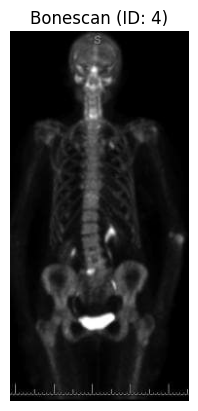

In [172]:
import matplotlib.pyplot as plt
# Example dummy vectors (replace with actual image data)
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
# Main function to get and display image
def main():
    person_name = "Bonescan"  # Replace with the desired person_name
    image_path,idname = get_image_by_person_name(data, person_name)

    if image_path:
     print(f"Displaying image for '{person_name}': {image_path} (ID: {idname})")
     display_image(image_path, title=f"{person_name} (ID: {idname})")
    else:
     print(f"No entry found for '{person_name}'.")

if __name__ == "__main__":
    main()
#show plot



#plt.imshow(item['vector'])  # Use cmap='gray' for grayscale images




In [164]:
import matplotlib.pyplot as plt
# Example dummy vectors (replace with actual image data)
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

person_name="Lungscan"
image_path = get_image_by_person_name(data, person_name)
idname=data.
print(f"Displaying image for '{person_name}': {image_path}:{idname}")
display_image(image_path)
    # Load the image using Pillow
img= Image.open(image_path)
plt.figure()
plt.title(f"{person_name} (ID: {idname})")
#plt.imshow(item['vector'])  # Use cmap='gray' for grayscale images
plt.imshow(img)
plt.axis('off')
plt.show()


TypeError: list indices must be integers or slices, not str

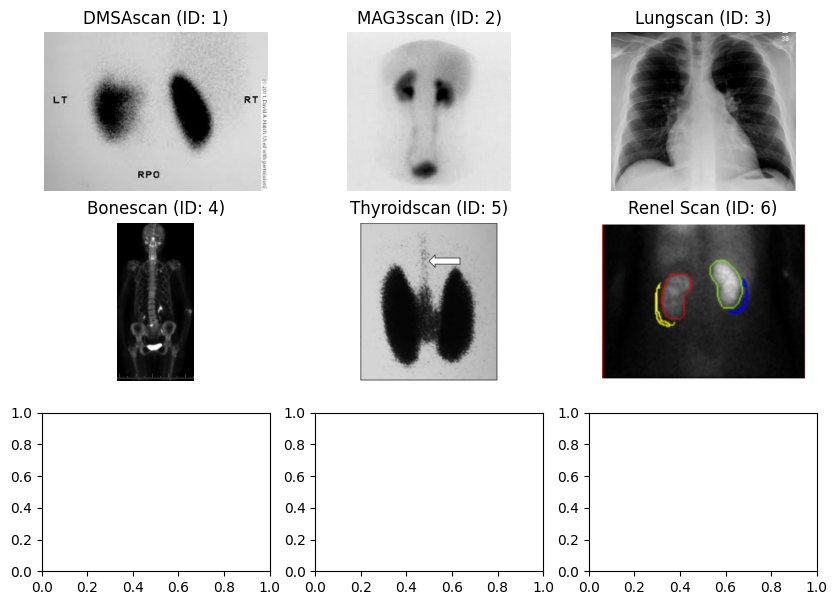

In [151]:
import matplotlib.pyplot as plt
# Example dummy vectors (replace with actual image data)
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
# Create a grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(10, 7))

for ax, item in zip(axes.ravel(), data):

     img1= Image.open(item["image_path"])
     ax.imshow(img1)
     ax.set_title(f"{item['person_name']} (ID: {item['id']})")
     ax.axis('off')

#plt.tight_layout()
#plt.show()

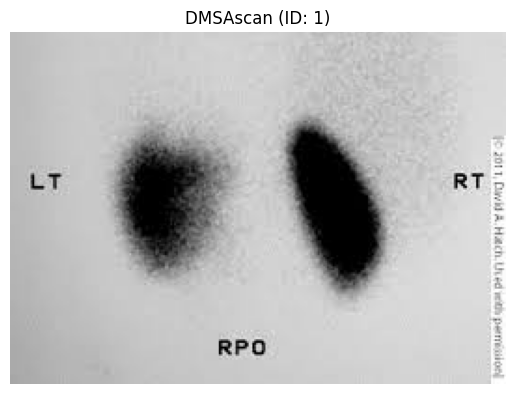

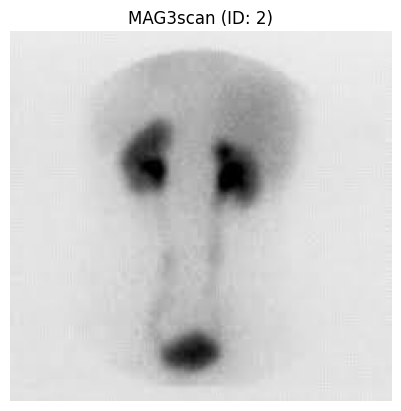

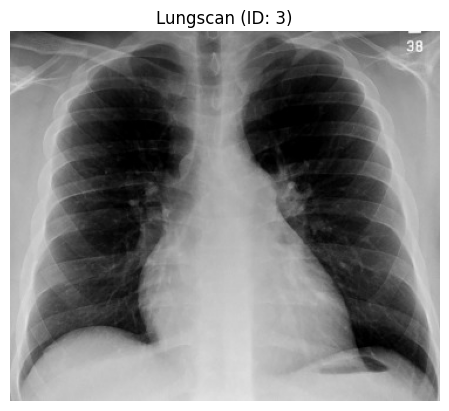

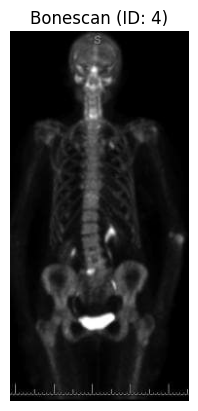

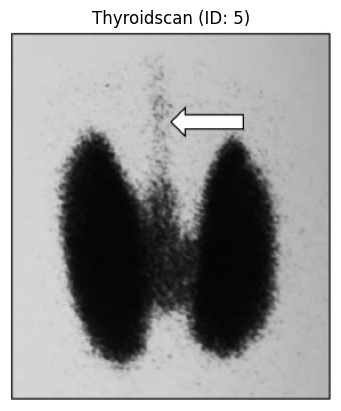

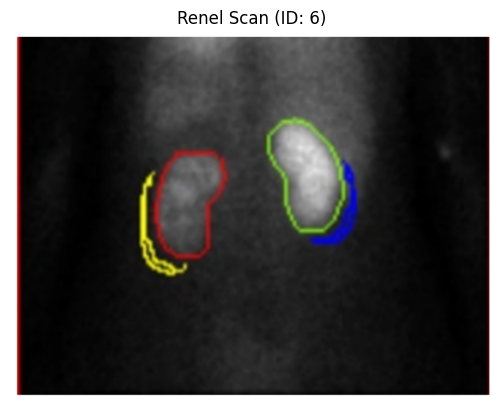

In [152]:
import matplotlib.pyplot as plt

# Example dummy vectors (replace with actual image data)
import numpy as np


# Display images
for item in data:

    # Load the image using Pillow
    img = Image.open(item["image_path"])

    plt.figure()
    plt.title(f"{item['person_name']} (ID: {item['id']})")
   #plt.imshow(item['vector'])  # Use cmap='gray' for grayscale images
    plt.imshow(img)
    plt.axis('off')
    plt.show()
